In [1]:
import os
import sys
import shutil
import pandas as pd
from classifier.shot_inference import ShotInference
import warnings
from IPython.display import display, Markdown, Latex,HTML
import matplotlib.pyplot as plt
import cv2
from open_pose_model.pose_predictor import Pose_predictor
warnings.filterwarnings('ignore')
%pylab inline
import tensorflow as tf


Using TensorFlow backend.


C:\Users\swlee\Desktop\badminton-pose-analysis


ModuleNotFoundError: No module named 'configobj'

## Classification of Badminton Shots

In [15]:
classification_model_path = 'saved_model\\shot_classifier'
classification_model_path = os.path.join(os.getcwd(), classification_model_path)
image_path = os.path.join(os.getcwd(), 'test_files\\')
image_names = os.listdir(image_path)
label_path = os.path.join(os.getcwd(), 'classifier\\label\\LCW\\output_detection_info.csv')
output_path = os.path.join(os.getcwd(), 'output/')
players = ['LCW', 'TTY']
shots = ['Smash', 'Drop', 'Defense', 'Backhand']
pose_model_path = os.path.join(os.getcwd(), 'saved_model\\keras_openpose_model.h5')
label = pd.read_csv(label_path, header=None)
print("xxxxxxxxxxxxxxxxxx")
inf_model = ShotInference(classification_model_path)
print(os.getcwd())

pose_detector = Pose_predictor(pose_model_path)

xxxxxxxxxxxxxxxxxx
C:\Users\Deepak Talwar\Dropbox (Personal)\SJSU\Semesters\Fall2019\CalHacks\badminton-pose-analysis
C:\Users\Deepak Talwar\Dropbox (Personal)\SJSU\Semesters\Fall2019\CalHacks\badminton-pose-analysis
{}


KeyError: 'param'

<h3> Backhand shot found in below Image</h3>

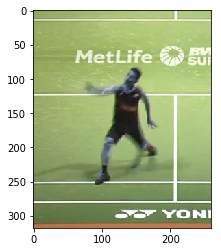

<h3> Backhand shot found in below Image</h3>

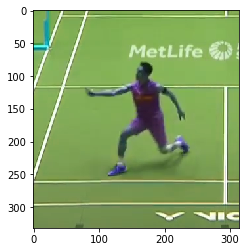

<h3> Backhand shot found in below Image</h3>

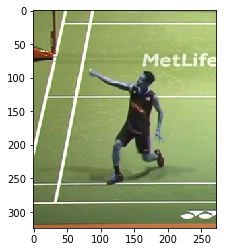

In [86]:
classification = {}
for img in image_names:
    if not img.endswith(".png"):
        continue
    
    full_image_path = os.path.join(image_path,img)
    row = label.loc[label[0] == img]
    bbox = (row[2].values[0], row[3].values[0], row[4].values[0], row[5].values[0])
    
    shot,op_frame = inf_model.predict(0, full_image_path, bbox)
    shot_name = shots[shot[0]]
    classification[img] = shot_name
    #out_path = os.path.join(output_path, players[0], shot_name)
    
    #shutil.copy(full_image_path, out_path)
    display(Markdown("<h3> "+shot_name+" shot found in below Image</h3>"))
    input_img = cv2.imread(full_image_path)        
    x_min = bbox[0]
    y_min = bbox[1]
    x_max = bbox[2]
    y_max = bbox[3]

    cropped_img = input_img[x_min:x_max, y_min:y_max]
    plt.imshow(cropped_img)
    plt.show()

## Extracting the body posture of the player for comparison 

In [96]:
for img in image_names:
    if not img.endswith(".png"):
        continue
    
    full_image_path = os.path.join(image_path,img)
    result,skeleton_img = pose_detector.single_predictor(full_image_path,output_path,label_path)
    plt.imshow(cropped_img)
    plt.show()

start processing...


NameError: name 'util' is not defined